In [44]:
%matplotlib inline

from matplotlib import pyplot as plt

import torch
from torch import nn
from torch import tensor

torch.Size([30, 1])
torch.Size([30])


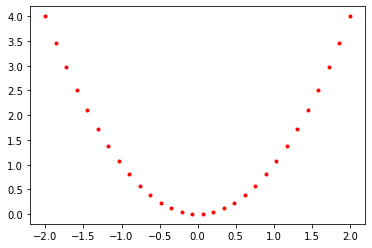

In [45]:
X = torch.linspace(-2., 2., 30).unsqueeze(1)
print(X.shape)
#Y = torch.cat([torch.zeros(10),  torch.linspace(0., 1., 10), 1. + torch.zeros(10)], dim=0)
Y = torch.square(X).flatten()
print(Y.shape)
plt.plot(X.squeeze().numpy(), Y.numpy(), 'r.')

In [46]:
def train(X, Y, model, loss_function, optim, num_epochs):
    loss_history = []
    
    def extra_plot(*args):
        plt.plot(X.squeeze(1).numpy(), Y.numpy(), 'r.', label="Ground truth")
        plt.plot(X.squeeze(1).numpy(), model(X).detach().numpy(), '-', label="Model")
        plt.title("Prediction")
        plt.legend(loc='lower right')
    
    #liveloss = PlotLosses(extra_plots=[extra_plot], plot_extrema=False)

    for epoch in range(num_epochs):
        
        epoch_loss = 0.0
        
        Y_pred = model(X)
        #print(Y_pred.shape)
        loss = loss_function(Y_pred, Y)
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
        
        loss.backward()
        optim.step()
        optim.zero_grad()

In [47]:
class Nonlinear(nn.Module):
    def __init__(self, hidden_size=2):
        super().__init__()
        
        self.layer_1_weights = nn.Parameter(torch.randn(1, hidden_size))
        self.layer_1_bias = nn.Parameter(torch.randn(hidden_size)) 
        
        self.layer_2_weights = nn.Parameter(torch.randn(hidden_size, 1) ) 
        self.layer_2_bias = nn.Parameter(torch.randn(1))
        
    def forward(self, x):
        x = x.matmul(self.layer_1_weights).add(self.layer_1_bias)
        x = x.sigmoid()
        x = x.matmul(self.layer_2_weights).add(self.layer_2_bias)
        return x.squeeze()
    
    def nonrandom_init(self):
        self.layer_1_weights.data = tensor([[1.1, 0.8]])
        self.layer_1_bias.data = tensor([0.5 , -0.7]) 
        self.layer_2_weights.data = tensor([[0.3], [-0.7]])
        self.layer_2_bias.data = tensor([0.2])

In [48]:
nonlinear_model = Nonlinear(hidden_size=5)
nonlinear_model.nonrandom_init()

#optim = torch.optim.SGD(nonlinear_model.parameters(), lr=0.2)
optim = torch.optim.Adam(nonlinear_model.parameters(), lr=0.1)
loss_function = nn.MSELoss()

In [49]:
train(X, Y, nonlinear_model, loss_function, optim, num_epochs=200)

epoch: 1, loss = 3.3739
epoch: 2, loss = 2.8480
epoch: 3, loss = 2.4245
epoch: 4, loss = 2.1009
epoch: 5, loss = 1.8720
epoch: 6, loss = 1.7299
epoch: 7, loss = 1.6640
epoch: 8, loss = 1.6592
epoch: 9, loss = 1.6950
epoch: 10, loss = 1.7476
epoch: 11, loss = 1.7952
epoch: 12, loss = 1.8244
epoch: 13, loss = 1.8304
epoch: 14, loss = 1.8156
epoch: 15, loss = 1.7861
epoch: 16, loss = 1.7490
epoch: 17, loss = 1.7109
epoch: 18, loss = 1.6773
epoch: 19, loss = 1.6517
epoch: 20, loss = 1.6357
epoch: 21, loss = 1.6292
epoch: 22, loss = 1.6306
epoch: 23, loss = 1.6374
epoch: 24, loss = 1.6466
epoch: 25, loss = 1.6554
epoch: 26, loss = 1.6617
epoch: 27, loss = 1.6643
epoch: 28, loss = 1.6628
epoch: 29, loss = 1.6577
epoch: 30, loss = 1.6499
epoch: 31, loss = 1.6407
epoch: 32, loss = 1.6315
epoch: 33, loss = 1.6234
epoch: 34, loss = 1.6172
epoch: 35, loss = 1.6133
epoch: 36, loss = 1.6115
epoch: 37, loss = 1.6113
epoch: 38, loss = 1.6117
epoch: 39, loss = 1.6119
epoch: 40, loss = 1.6111
epoch: 41

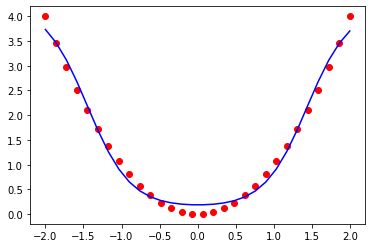

In [50]:
# Plot
predicted = nonlinear_model(X).detach().numpy()

plt.plot(X.numpy(), Y.numpy(), 'ro')
plt.plot(X.numpy(), predicted, 'b')
plt.show()

In [1]:
asdf

NameError: name 'asdf' is not defined